In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Train.csv file EDA

In [3]:
train_df = pd.read_csv(r"D:\VIIT\SEM 5\SCE\AI\placement-classifier\train.csv")

print("Train.csv file Structure: ")
train_df.info()
print("Original Data\n")
print(train_df)

Train.csv file Structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       253 non-null    object 
 1   10th       135 non-null    float64
 2   12th       113 non-null    float64
 3   College    135 non-null    float64
 4   Amcat      135 non-null    float64
 5   Placement  253 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 12.0+ KB
Original Data

                          Name  10th   12th  College  Amcat  Placement
0          MOHITE AARTI RAMESH  92.0  82.00     9.50   87.0          1
1    WALUNJKAR SIDDHI SHAHURAO   NaN    NaN      NaN    NaN          1
2       KABADI KAIVALYA SUDHIR  92.0  86.00     9.00   51.0          1
3          MULLA MOIN ADILSHAH  91.0  84.00     9.80   64.0          1
4      BHAPKAR SHRUTI MOHANRAO  84.5    NaN     9.41    0.0          1
..                         ...   ...    ...  

In [4]:
train_df.head()

,Name,10th,12th,College,Amcat,Placement
0,MOHITE AARTI RAMESH,92.0,82.0,9.50,87.0,1
1,WALUNJKAR SIDDHI SHAHURAO,NaN,NaN,NaN,NaN,1
2,KABADI KAIVALYA SUDHIR,92.0,86.0,9.00,51.0,1
3,MULLA MOIN ADILSHAH,91.0,84.0,9.80,64.0,1
4,BHAPKAR SHRUTI MOHANRAO,84.5,NaN,9.41,0.0,1


In [5]:
# Check missing values in the train data
missing_counts_train = train_df.isnull().sum()
print("Missing Values: \n",missing_counts_train)

Missing Values: 
 Name           0
10th         118
12th         140
College      118
Amcat        118
Placement      0
dtype: int64


In [6]:
# we filled 10th column null values with median of 10th column
train_df['10th'].fillna(train_df['10th'].median(), inplace=True)
print("Updated Missing Value Count for 10th% Column:", train_df['10th'].isnull().sum())


Updated Missing Value Count for 10th% Column: 0


In [7]:
# we filled 12th column null values with median of 12th column
train_df['12th'].fillna(train_df['12th'].median(), inplace=True)
print("Updated Missing Value Count for 12th% Column:", train_df['12th'].isnull().sum())

Updated Missing Value Count for 12th% Column: 0


In [8]:
# some rows in college column has cgpa greater than 10  
temp = train_df[train_df['College']>10]
print("No. of rows having CGPA greater than 10:", len(temp))

No. of rows having CGPA greater than 10: 8


In [9]:
# divide it by 10
train_df.loc[train_df['College'] > 10, 'College'] = train_df.loc[train_df['College'] > 10, 'College'] / 10

In [10]:
temp = train_df[train_df['College']>10]
print("Updated of rows having value greater than 10 in College Column", len(temp))
# temp

Updated of rows having value greater than 10 in College Column 0


In [11]:
print("Number of Missing Value in College Column: ", train_df["College"].isnull().sum())

Number of Missing Value in College Column:  118


In [12]:
train_df['College'].fillna(train_df["College"].median(), inplace=True)
print("Updated Missing Value Count for College Column:", train_df["College"].isnull().sum())

Updated Missing Value Count for College Column: 0


In [13]:
train_df['Amcat'].fillna(train_df["Amcat"].median(), inplace=True)
print("Updated Missing Value count for Amcat Column:", train_df["Amcat"].isnull().sum())

Updated Missing Value count for Amcat Column: 0


In [14]:
# Check missing values in the train data
missing_counts_train = train_df.isnull().sum()
print("Missing Values: \n",missing_counts_train)

Missing Values: 
 Name         0
10th         0
12th         0
College      0
Amcat        0
Placement    0
dtype: int64


# Test.csv file EDA

In [15]:
import pandas as pd

# Read the test csv file
test_df = pd.read_csv(r"D:\VIIT\SEM 5\SCE\AI\placement-classifier\test.csv")

print("Test.csv file Structure: ")
test_df.info()
print(" Orifinal Data")
print(test_df)

Test.csv file Structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Studid   73 non-null     int64  
 1   Name     73 non-null     object 
 2   10th     44 non-null     float64
 3   12th     39 non-null     float64
 4   College  44 non-null     float64
 5   Amcat    44 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB
 Orifinal Data
    Studid                       Name  10th   12th  College  Amcat
0        1     BHALERAO KAJAL SHANKAR  72.4    NaN    88.00    7.0
1        2    BHATEWARA JINESH JAYANT   NaN    NaN      NaN    NaN
2        3      KANSAGARA JEET ASHWIN   NaN    NaN      NaN    NaN
3        4    DESHPANDE ISHAN SHIRISH   NaN    NaN      NaN    NaN
4        5  BHANUSHALI HARSHIT DHIRAJ  90.0  82.46     9.40   94.0
..     ...                        ...   ...    ...      ...    ...
68      69        KOLH

In [16]:
test_df.head()

,Studid,Name,10th,12th,College,Amcat
0,1,BHALERAO KAJAL SHANKAR,72.4,NaN,88.0,7.0
1,2,BHATEWARA JINESH JAYANT,NaN,NaN,NaN,NaN
2,3,KANSAGARA JEET ASHWIN,NaN,NaN,NaN,NaN
3,4,DESHPANDE ISHAN SHIRISH,NaN,NaN,NaN,NaN
4,5,BHANUSHALI HARSHIT DHIRAJ,90.0,82.46,9.4,94.0


In [17]:
# Check missing values in the test data
missing_counts_test = test_df.isnull().sum()
print("Missing Value:")
print(missing_counts_test)

Missing Value:
Studid      0
Name        0
10th       29
12th       34
College    29
Amcat      29
dtype: int64


In [18]:
# we filled 10th column null values with median of 10th column
test_df['10th'].fillna(test_df['10th'].median(), inplace=True)
print("Updated Missing Value Count for 10th% column:", test_df['10th'].isnull().sum())

Updated Missing Value Count for 10th% column: 0


In [19]:
# we filled 12th column null values with median of 12th column
test_df['12th'].fillna(test_df['12th'].median(), inplace=True)
print("Updated Missing Value Count for 12th% College:", test_df['12th'].isnull().sum())

Updated Missing Value Count for 12th% College: 0


In [20]:
# some rows in college column has cgpa greater than 10  
temp1 = test_df[test_df['College']>10]
print("No. of rows having Value Greatet than 10 in College Column:", len(temp1))

No. of rows having Value Greatet than 10 in College Column: 3


In [21]:
# divide it by 10
test_df.loc[test_df['College'] > 10, 'College'] = test_df.loc[test_df['College'] > 10, 'College'] / 10

In [22]:
test_df['College'].fillna(test_df["College"].median(), inplace=True)
print("Number of rows having value greatet than 10 in College Column:",test_df["College"].isnull().sum())

Number of rows having value greatet than 10 in College Column: 0


In [23]:
temp1 = test_df[train_df['College']>10]
print("Updated Rows Having value greater than 10 in College Column:", len(temp1))
# temp1

Updated Rows Having value greater than 10 in College Column: 0


C:\Users\khach\AppData\Local\Temp\ipykernel_9348\2468237991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp1 = test_df[train_df['College']>10]


In [24]:
test_df['Amcat'].fillna(test_df["Amcat"].median(), inplace=True)
print("Missing Value in Amcat Column:", test_df["Amcat"].isnull().sum())

Missing Value in Amcat Column: 0


In [25]:
# Check missing values in the test data
missing_counts_test = test_df.isnull().sum()
print("Missing Value: ")
print(missing_counts_test)

Missing Value: 
Studid     0
Name       0
10th       0
12th       0
College    0
Amcat      0
dtype: int64


# Visualization

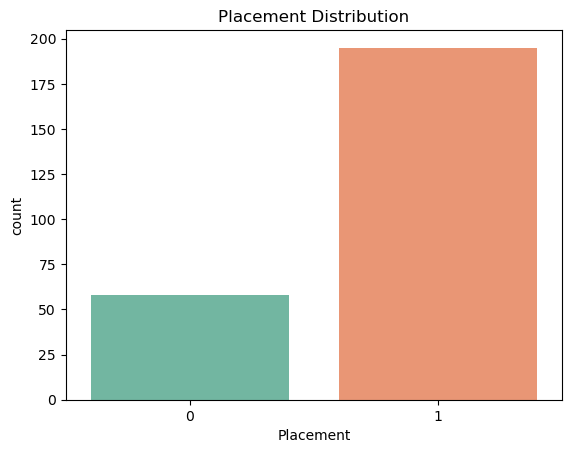

In [26]:
sns.countplot(x='Placement', data=train_df, palette='Set2')
plt.title('Placement Distribution')
plt.show()

In [27]:
print("Placed and Not-Placed Student:")
print(train_df["Placement"].value_counts())

Placed and Not-Placed Student:
1    195
0     58
Name: Placement, dtype: int64


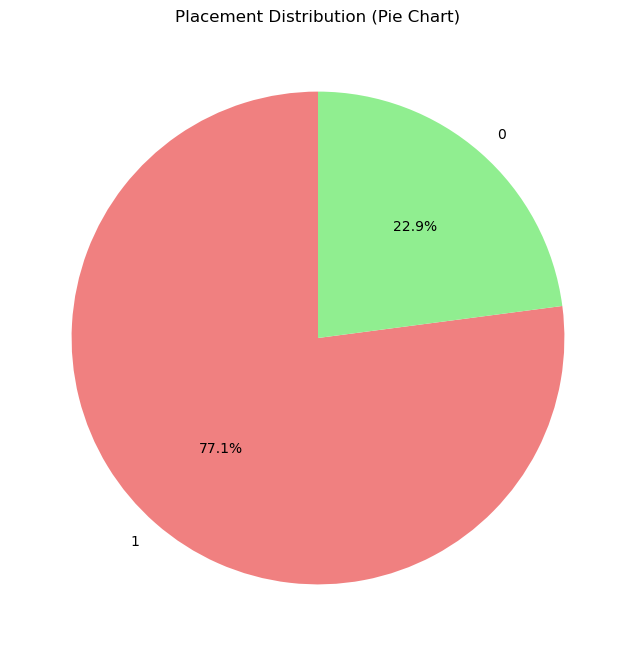

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(train_df['Placement'].value_counts(), labels=train_df['Placement'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Placement Distribution (Pie Chart)')
plt.show()

C:\Users\khach\AppData\Local\Temp\ipykernel_9348\2162986405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


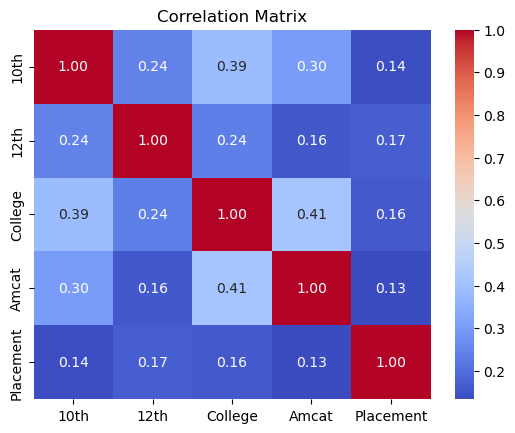

In [31]:
# Correlation matrix
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

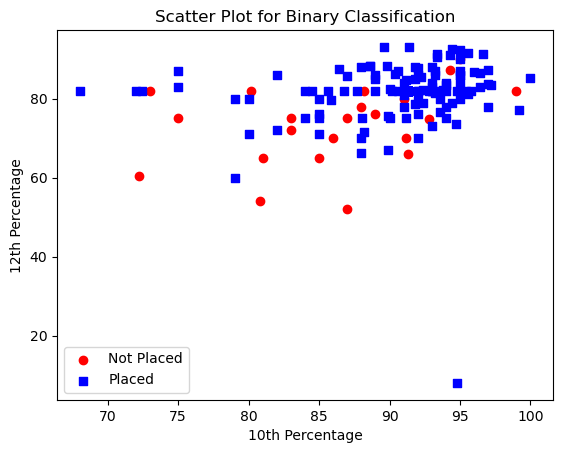

In [32]:
# Scatter plot for binary classification (using '10th' and '12th' columns as an example)
plt.scatter(train_df[train_df['Placement'] == 0]['10th'], train_df[train_df['Placement'] == 0]['12th'], label='Not Placed', marker='o', color='red')
plt.scatter(train_df[train_df['Placement'] == 1]['10th'], train_df[train_df['Placement'] == 1]['12th'], label='Placed', marker='s', color='blue')

# Add labels and title
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.title('Scatter Plot for Binary Classification')
plt.legend()  # Show legend

# Show the plot
plt.show()

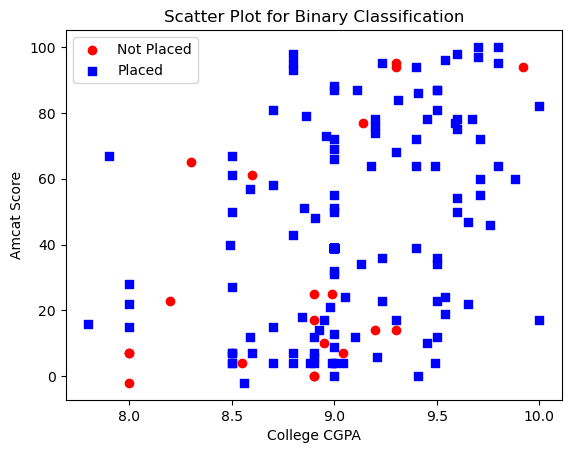

In [33]:
# Scatter plot for binary classification (using '10th' and '12th' columns as an example)
plt.scatter(train_df[train_df['Placement'] == 0]['College'], train_df[train_df['Placement'] == 0]['Amcat'], label='Not Placed', marker='o', color='red')
plt.scatter(train_df[train_df['Placement'] == 1]['College'], train_df[train_df['Placement'] == 1]['Amcat'], label='Placed', marker='s', color='blue')

# Add labels and title
plt.xlabel('College CGPA')
plt.ylabel('Amcat Score')
plt.title('Scatter Plot for Binary Classification')
plt.legend()  # Show legend

# Show the plot
plt.show()

# Model Building and Testing

In [34]:
test_features = ['10th', '12th', 'College', 'Amcat']

# Solution.csv for y test

In [35]:
solution_df = pd.read_csv(r"D:\VIIT\SEM 5\SCE\AI\placement-classifier\solution.csv")

In [36]:
# Assuming 'Placement' is the target column
y_test = solution_df['Placement']

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
#Feature Selection
features = ['10th', '12th', 'College', 'Amcat']

In [39]:
train_df.isnull().sum()

Name         0
10th         0
12th         0
College      0
Amcat        0
Placement    0
dtype: int64

In [40]:
#select features for training
X_train = train_df[features]
y_train = train_df['Placement']

In [41]:
X_test = test_df[test_features]

In [42]:
X_train

,10th,12th,College,Amcat
0,92.0,82.00,9.50,87.0
1,91.3,82.00,9.00,39.0
2,92.0,86.00,9.00,51.0
3,91.0,84.00,9.80,64.0
4,84.5,82.00,9.41,0.0
...,...,...,...,...
248,92.8,74.92,8.90,0.0
249,91.3,82.00,9.00,39.0
250,91.3,82.00,9.00,39.0
251,95.0,90.00,9.04,7.0


In [43]:
#Train the Model
lmodel = LogisticRegression()
lmodel.fit(X_train, y_train)

LogisticRegression()

In [44]:
lmodel.score(X_train, y_train)

0.7786561264822134

In [45]:
predictions = lmodel.predict(X_test)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [46]:
lmodel.predict_proba(X_test)

array([[0.40314129, 0.59685871],
       [0.19931151, 0.80068849],
       [0.19931151, 0.80068849],
       [0.19931151, 0.80068849],
       [0.12813205, 0.87186795],
       [0.19931151, 0.80068849],
       [0.19931151, 0.80068849],
       [0.20689413, 0.79310587],
       [0.10920333, 0.89079667],
       [0.22651552, 0.77348448],
       [0.19931151, 0.80068849],
       [0.17031926, 0.82968074],
       [0.20065738, 0.79934262],
       [0.14331121, 0.85668879],
       [0.1248717 , 0.8751283 ],
       [0.19931151, 0.80068849],
       [0.19931151, 0.80068849],
       [0.14812241, 0.85187759],
       [0.34067251, 0.65932749],
       [0.19931151, 0.80068849],
       [0.121782  , 0.878218  ],
       [0.11619789, 0.88380211],
       [0.27516642, 0.72483358],
       [0.15200754, 0.84799246],
       [0.19931151, 0.80068849],
       [0.1737265 , 0.8262735 ],
       [0.19931151, 0.80068849],
       [0.2078247 , 0.7921753 ],
       [0.19931151, 0.80068849],
       [0.09045231, 0.90954769],
       [0.

In [47]:
# Make predictions on the test set
y_test_pred_logistic = lmodel.predict(X_test)

# Calculate confusion matrix, accuracy, precision, recall, and f1 score
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
accuracy = accuracy_score(y_test, y_test_pred_logistic)

print("Confusion Matrix:")
print(conf_matrix)

print(f'Accuracy: {accuracy}')
# Calculate precision, recall, and F1 score for Logistic Regression
precision_logistic = precision_score(y_test, y_test_pred_logistic, average='binary')
recall_logistic = recall_score(y_test, y_test_pred_logistic, average='binary')
f1_logistic = f1_score(y_test, y_test_pred_logistic, average='binary')

print("\nLogistic Regression Metrics:")
print(f'Precision: {precision_logistic}')
print(f'Recall: {recall_logistic}')
print(f'F1 Score: {f1_logistic}')
score =  lmodel.score(X_test, y_test)

print("Score: ", score )

Confusion Matrix:
[[ 1 11]
 [ 1 60]]
Accuracy: 0.8356164383561644

Logistic Regression Metrics:
Precision: 0.8450704225352113
Recall: 0.9836065573770492
F1 Score: 0.9090909090909091
Score:  0.8356164383561644


# SVM

In [48]:
# Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the training set (for demonstration purposes)
y_test_pred_svm = svm_model.predict(X_test)

# Make predictions on the test set
predictions = svm_model.predict(X_test)
# Print the predictions
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [49]:

# Calculate confusion matrix, accuracy, precision, recall, and f1 score for SVM
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

print("\nSVM Metrics:")
print("Confusion Matrix:")
print(conf_matrix_svm)

precision_svm = precision_score(y_test, y_test_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_test_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_test_pred_svm, average='binary')
score = svm_model.score(X_test, y_test)
print(f'Score: {score}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')


SVM Metrics:
Confusion Matrix:
[[ 0 12]
 [ 0 61]]
Score: 0.8356164383561644
Precision: 0.8356164383561644
Recall: 1.0
F1 Score: 0.9104477611940298


Text(58.222222222222214, 0.5, 'Truth')

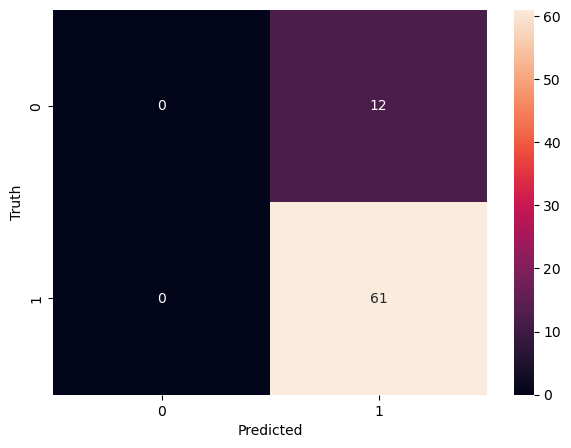

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_svm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [51]:
notplaced = solution_df[solution_df["Placement"] == 1]
len(notplaced) #number of placed student

61

In [52]:
placed = solution_df[solution_df["Placement"] == 0]
len(placed) #number of non placed student

12

# Decision Tree

In [53]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_test_pred_dt = dt_model.predict(X_test)

accuracy_train = accuracy_score(y_test, y_test_pred_dt)
print(f'Training Accuracy: {accuracy_train}')

predictions_dt = dt_model.predict(X_test)

print(predictions_dt)

Training Accuracy: 0.8904109589041096
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1]


In [88]:
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree Metrics:")
print("Confusion Matrix:")
print(conf_matrix_dt)
print(f'Accuracy: {accuracy_dt}')

# Calculate precision, recall, and F1 score for Decision Tree
precision_dt = precision_score(y_test, y_test_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_test_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_test_pred_dt, average='binary')

print("\nDecision Tree Metrics:")
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')

Decision Tree Metrics:
Confusion Matrix:
[[ 5  7]
 [ 1 60]]
Accuracy: 0.8904109589041096

Decision Tree Metrics:
Precision: 0.8955223880597015
Recall: 0.9836065573770492


Text(58.222222222222214, 0.5, 'Truth')

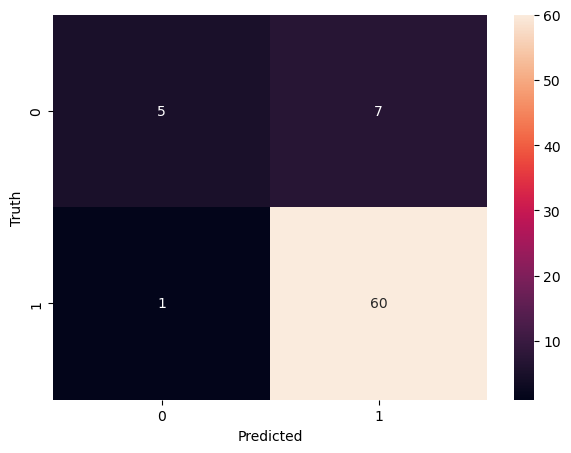

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_dt, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {accuracy_train}')
# Make predictions on the test set
predictions = rf_model.predict(X_test)

print(predictions)


Training Accuracy: 0.857707509881423
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1]


In [57]:
# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate confusion matrix, accuracy, precision, recall, and f1 score
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)

print(f'Accuracy: {accuracy}')

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Assuming 'Placement' is the target column
y_test = solution_df['Placement']

precision_rf = precision_score(y_test, y_test_pred, average='binary')
recall_rf = recall_score(y_test, y_test_pred, average='binary')
f1_rf = f1_score(y_test, y_test_pred, average='binary')

print("\nRandom Forest Metrics:")
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')

Confusion Matrix:
[[ 5  7]
 [ 0 61]]
Accuracy: 0.9041095890410958

Random Forest Metrics:
Precision: 0.8970588235294118
Recall: 1.0
F1 Score: 0.9457364341085273


# Save Random Forest Model To Predictions.csv File

In [58]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)
# Create a DataFrame with 'Studid' and 'Predicted_Labels' columns
results_df = pd.DataFrame({'Studid': test_df['Studid'], 'Predicted_Labels': predictions})

# Save results to a CSV file
results_df.to_csv('predictions.csv', index=False)

Text(58.222222222222214, 0.5, 'Truth')

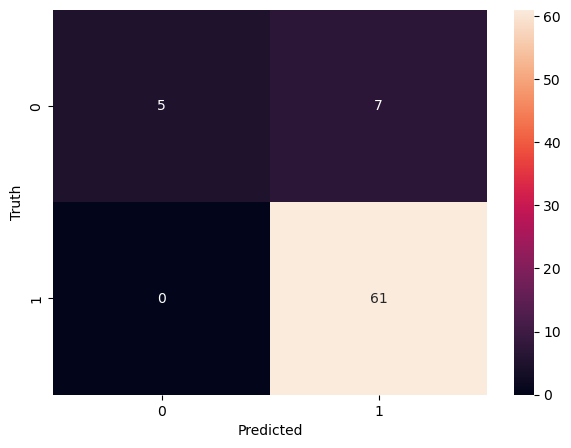

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [60]:
placed = solution_df[solution_df["Placement"] == 0]
len(placed) #number of non placed student

12

In [68]:
notplaced = solution_df[solution_df["Placement"] == 1]
len(notplaced) #number of placed student

61

In [62]:
rf_model.predict_proba(X_test)

array([[0.1       , 0.9       ],
       [0.03194915, 0.96805085],
       [0.03194915, 0.96805085],
       [0.03194915, 0.96805085],
       [0.05      , 0.95      ],
       [0.03194915, 0.96805085],
       [0.03194915, 0.96805085],
       [0.01      , 0.99      ],
       [0.11      , 0.89      ],
       [0.08      , 0.92      ],
       [0.03194915, 0.96805085],
       [0.04      , 0.96      ],
       [0.06      , 0.94      ],
       [0.02275591, 0.97724409],
       [0.        , 1.        ],
       [0.03194915, 0.96805085],
       [0.03194915, 0.96805085],
       [0.        , 1.        ],
       [0.26      , 0.74      ],
       [0.03194915, 0.96805085],
       [0.03      , 0.97      ],
       [0.        , 1.        ],
       [0.11300255, 0.88699745],
       [0.1       , 0.9       ],
       [0.03194915, 0.96805085],
       [0.12      , 0.88      ],
       [0.03194915, 0.96805085],
       [0.02415285, 0.97584715],
       [0.03194915, 0.96805085],
       [0.07      , 0.93      ],
       [0.

# KNN

In [85]:
# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_knn = knn_model.predict(X_test)

# Assuming 'Placement' is the target column
y_test_knn = solution_df['Placement']

# Calculate confusion matrix, accuracy, precision, recall, and f1 score for KNN
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
accuracy_knn = accuracy_score(y_test_knn, y_test_pred_knn)

print("KNN Metrics:")
print("Confusion Matrix:")
print(conf_matrix_knn)
print(f'Accuracy: {accuracy_knn}')

# Calculate precision, recall, and F1 score for KNN
precision_knn = precision_score(y_test_knn, y_test_pred_knn, average='binary')
recall_knn = recall_score(y_test_knn, y_test_pred_knn, average='binary')
f1_knn = f1_score(y_test_knn, y_test_pred_knn, average='binary')

KNN Metrics:
Confusion Matrix:
[[ 0 12]
 [ 0 61]]
Accuracy: 0.8356164383561644


Text(58.222222222222214, 0.5, 'Truth')

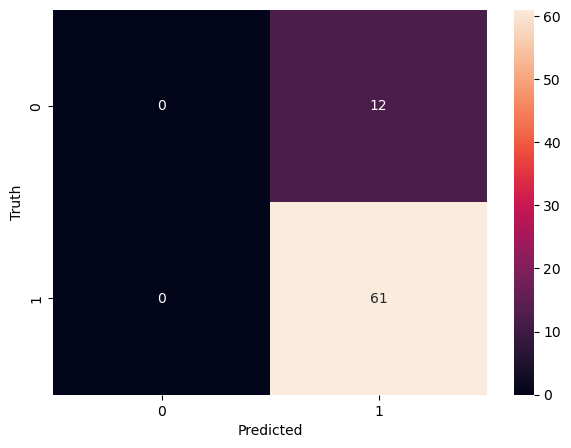

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [82]:
knn_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Ensemble Learning

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

Gradient Boosting Accuracy: 0.90


In [75]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier with Random Forest, Gradient Boosting, Logistic Regression, and SVM
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('gradient_boosting', gradient_boosting_model),
        ('Decision Tree', dt_model),
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}")



Voting Classifier Accuracy: 0.90


Text(58.222222222222214, 0.5, 'Truth')

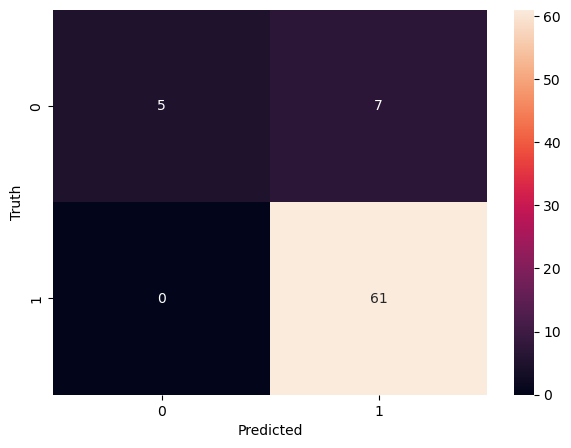

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns

# Calculate confusion matrix, accuracy, precision, recall, and f1 score for KNN
conf_matrix_vote = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_vote, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")